# <h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Preprocessing and Analysis of Textual Data
# </font>
# </h1>

# In this project, the preprocessing steps are performed on a collection of news texts. These steps include:
# 
# - Loading and distributing data
# - Text preprocessing
# - Tokenization, removing stopwords, part-of-speech tagging, stemming, and lemmatization
# - Saving the produced outputs in separate files

# ---
# 
# <h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Importing the Required Libraries
# </font>
# </h2>
# 
# <p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the necessary libraries for performing the project are imported.
# </font>
# </p>

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# <h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Loading Data
# </font>
# </h2>
# <p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=5>
# The news classification data is loaded from a CSV file, and the first five rows are inspected.
# </font>
# </p>

In [2]:
# Load the dataset from a CSV file and display the first five rows
df = pd.read_csv('../Data/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# <h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Distribution of News Categories
# </font>
# </h2>
# <p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=5>
# A chart is plotted to show the number of samples available in each news category.
# </font>
# </p>

C:\Users\arshi\AppData\Local\Temp\ipykernel_11988\4203793356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='viridis')


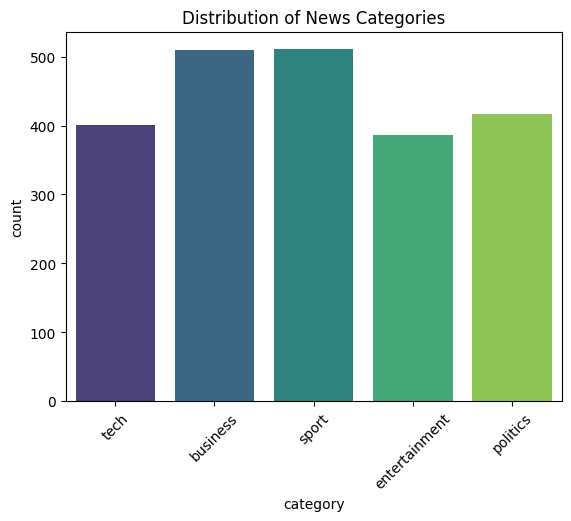

In [3]:
# Visualize the distribution of news categories using a count plot
sns.countplot(data=df, x='category', palette='viridis')
plt.title("Distribution of News Categories")
plt.xticks(rotation=45)
plt.show()

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Text Preprocessing
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this stage, the texts are preprocessed, including the following steps:
# <br>
# 1- Converting to lowercase
# <br>
# 2- Removing punctuation
# <br>
# 3- Tokenizing
# <br>
# 4- Removing stopwords
# <br>
# 5- Performing lemmatization
# </font>
# </p>

In [4]:
# Download required NLTK resources for tokenization, stopwords, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re

# Initialize stopwords set, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text.lower()
    
    # Remove punctuation using regex
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    
    # Remove digits using regex
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text by splitting
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Apply lemmatization to each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return " ".join(tokens)

# Apply preprocessing to the 'text' column and store in a new column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Display the original and preprocessed text for comparison
df[['text', 'preprocessed_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,preprocessed_text
0,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [6]:
# Install the wordcloud library
!pip install wordcloud

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Word Cloud Visualization
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this stage, a word cloud is visualized for each news category.
# </font>
# </p>

In [7]:
# Access the preprocessed text column
df['preprocessed_text']

0       tv future hand viewer home theatre system plas...
1       worldcom bos left book alone former worldcom b...
2       tiger wary farrell gamble leicester say rushed...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    car pull u retail figure u retail sale fell ja...
2221    kilroy unveils immigration policy ex chatshow ...
2222    rem announce new glasgow concert u band rem an...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress bos graeme soune...
Name: preprocessed_text, Length: 2225, dtype: object

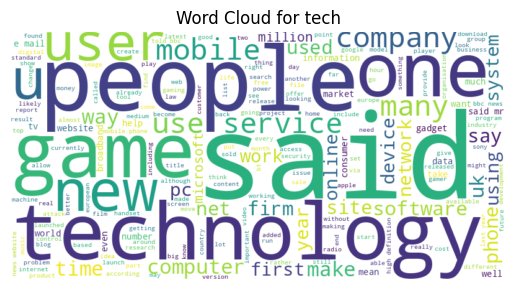

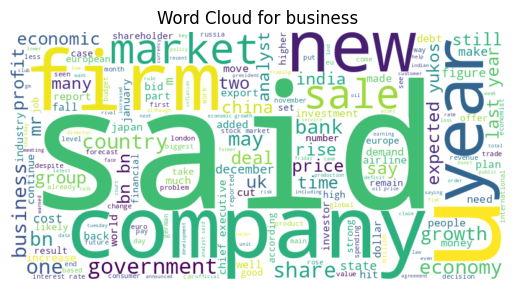

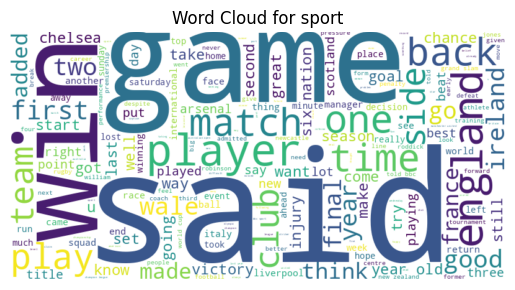

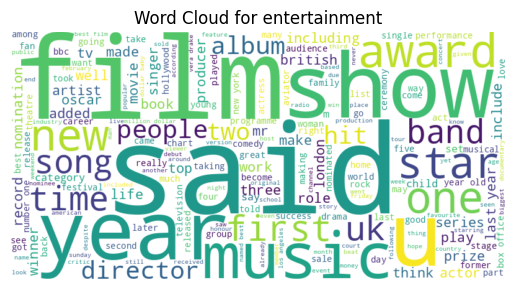

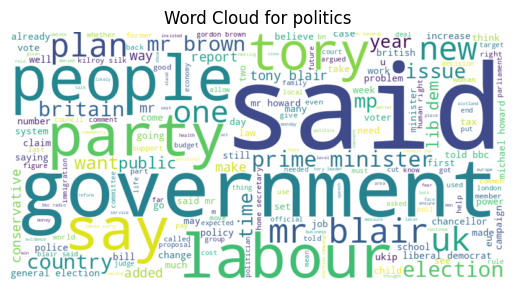

In [8]:
# Import WordCloud for visualization
from wordcloud import WordCloud

# Generate and display a word cloud for each unique category
for category in df['category'].unique():
    # Combine all preprocessed text for the current category
    category_text = " ".join(df[df['category'] == category]['preprocessed_text'])

    # Create and display a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(category_text)
    plt.imshow(wordcloud, interpolation='bilinear')

    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.show()

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Word Frequency Analysis
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the frequency of each word in the preprocessed texts is counted. Then, the top 20 most frequent words are extracted and displayed as a bar chart.
# </font>
# </p>

C:\Users\arshi\AppData\Local\Temp\ipykernel_11988\870421786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_df, x='Frequency', y='Word', palette='plasma')


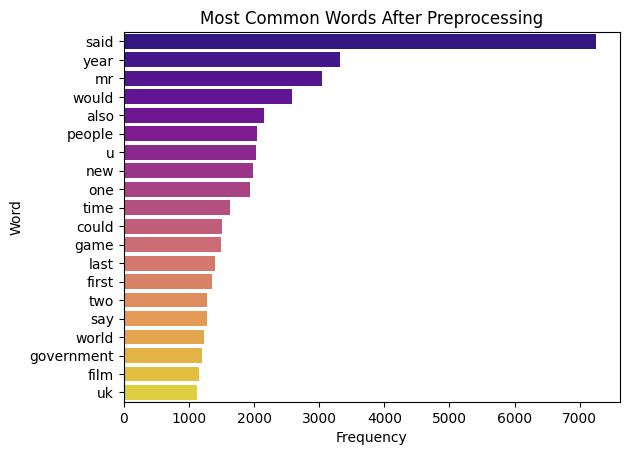

In [9]:
# Count the frequency of all words in the preprocessed text
all_words = [word for text in df['preprocessed_text'] for word in text.split()]

# Use Counter to calculate word frequencies
word_freq = Counter(all_words)

# Extract the 20 most common words
most_common_words = word_freq.most_common(20)
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Visualize the most common words using a bar plot
sns.barplot(data=common_df, x='Frequency', y='Word', palette='plasma')
plt.title("Most Common Words After Preprocessing")
plt.show()

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Vectorization Using TF-IDF
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# To vectorize the preprocessed texts, the TF-IDF method is used. This method assigns a weight to each word, indicating its importance in the text. The output of this section is a sparse matrix, where each row represents a document and each column represents a word feature.
# </font>
# </p>

In [10]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the preprocessed text into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

# Display the shape of the TF-IDF matrix
tfidf_matrix.shape

(2225, 24739)

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Displaying Top TF-IDF Features
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the TF-IDF values for the first document are displayed. The top features are sorted based on their TF-IDF scores, and a bar chart is plotted to visualize them.
# </font>
# </p>

C:\Users\arshi\AppData\Local\Temp\ipykernel_11988\3708258863.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_sample, x='TF-IDF Score', y='Word', palette='cividis')


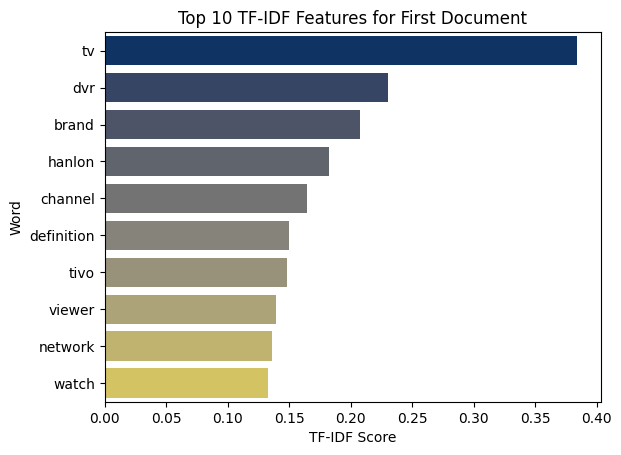

In [11]:
# Extract TF-IDF scores for the first document
tfidf_sample = pd.DataFrame(tfidf_matrix[0].toarray().T, columns=["TF-IDF Score"])
tfidf_sample['Word'] = tfidf_vectorizer.get_feature_names_out()
tfidf_sample = tfidf_sample.sort_values(by="TF-IDF Score", ascending=False).head(10)

# Visualize the top 10 TF-IDF features for the first document
sns.barplot(data=tfidf_sample, x='TF-IDF Score', y='Word', palette='cividis')
plt.title("Top 10 TF-IDF Features for First Document")
plt.show()

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Encoding Categories
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# To use textual categories in machine learning models, they need to be converted to numerical values. In this section, <code>LabelEncoder</code> is used to encode the categories.
# </font>
# </p>

In [12]:
# Initialize and apply LabelEncoder to encode the 'category' column
label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Display unique categories and their encoded values
df[['category', 'category_encoded']].drop_duplicates().sort_values('category_encoded')

,category,category_encoded
1,business,0
4,entertainment,1
5,politics,2
2,sport,3
0,tech,4


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Splitting Data into Training and Testing Sets
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# To evaluate the model, the data is split into training and testing sets. The training data is used for model learning, and the testing data is used to assess its accuracy.
# </font>
# </p>

In [13]:
# Define features (X) and target (y) for the model
X = tfidf_matrix
y = df['category_encoded']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape

((1780, 24739), (445, 24739))

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Training the Model
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the <code>RandomForestClassifier</code> model is trained on the training data. This model is chosen due to its high capability in learning complex patterns and automatic feature tuning.
# </font>
# </p>

In [14]:
# Initialize and train a RandomForestClassifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Model Evaluation
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# The model's performance is evaluated using various metrics, including the classification report, confusion matrix, and overall accuracy. The results are analyzed using charts and metrics.
# </font>
# </p>


Classification Report:
               precision    recall  f1-score   support

     business       0.90      0.94      0.92       101
entertainment       1.00      0.93      0.96        81
     politics       0.92      0.96      0.94        83
        sport       0.98      0.99      0.98        98
         tech       0.97      0.94      0.96        82

     accuracy                           0.95       445
    macro avg       0.96      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



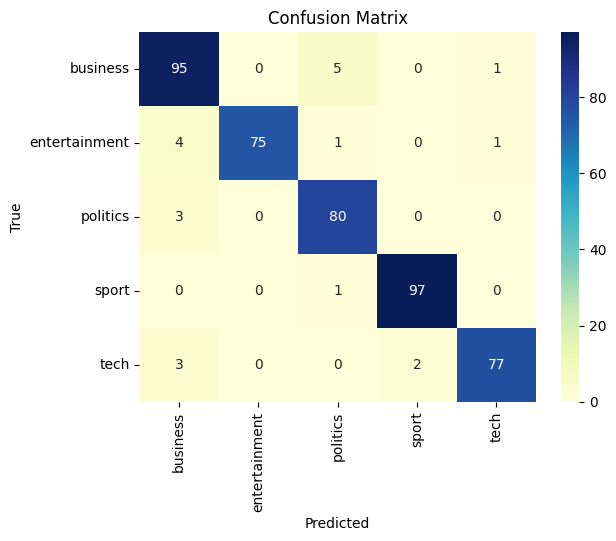

Overall Accuracy: 0.95


In [15]:
# Predict on the test data
y_pred = classifier.predict(X_test)

# Print classification report to evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

In [16]:
# Display the first five rows of the dataset
df.head()

,category,text,preprocessed_text,category_encoded
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Saving Predictions
# </font>
# </h2>
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the model's predicted results, along with the preprocessed texts, are saved in a CSV file. This file can be used for further analysis and comparison with actual values.
# </font>
# </p>

In [17]:
# Create a DataFrame with test indices, preprocessed text, and predicted categories
test_indices = y_test.index
output_df = pd.DataFrame({
    'index': test_indices,
    'preprocessed_text': df.loc[test_indices, 'preprocessed_text'],
    'predicted_category': label_encoder.inverse_transform(y_pred)
})

# Save the predictions to a CSV file
output_df.to_csv('predictions.csv', index=False)
output_df.head()

,index,preprocessed_text,predicted_category
414,414,brown blair face new rift claim umpteenth time...,politics
420,420,small firm hit rising cost rising fuel materia...,business
1644,1644,spirit award hail sideways comedy sideways dom...,entertainment
416,416,microsoft release patch microsoft warned pc us...,tech
1232,1232,arsenal penalty arsenal win penalty spanish go...,sport


In [18]:
# Zip the project files for submission
import zipfile

files_to_zip = ['Project.ipynb', 'predictions.csv']
zip_filename = 'submission.zip'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in files_to_zip:
        try:
            zipf.write(file)
            print(f"Added {file} to {zip_filename}")
        except FileNotFoundError:
            print(f"Warning: {file} not found. Skipping.")

print(f"Files have been zipped into {zip_filename}, you can now submit it!")

Added Project.ipynb to submission.zip
Added predictions.csv to submission.zip
Files have been zipped into submission.zip, you can now submit it!
